In [9]:
!pip install cryptography==38.0.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
data = pd.read_csv("C:\\Users\\shama\\Downloads\\Resume.csv")
data

,Resumes,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume
...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resume
75,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resume
76,\n[pic] Name...,Workday Resume
77,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resume


Removing Unnecessary words
   

In [11]:
data.Resumes.str.contains('https://').value_counts() / len(data)

False    0.911392
True     0.088608
Name: Resumes, dtype: float64

In [12]:
data.Resumes.str.contains('@').value_counts() / len(data)

False    0.962025
True     0.037975
Name: Resumes, dtype: float64

In [13]:
print('Total Resumes:', len(data.index), '\n')

Total Resumes: 79 



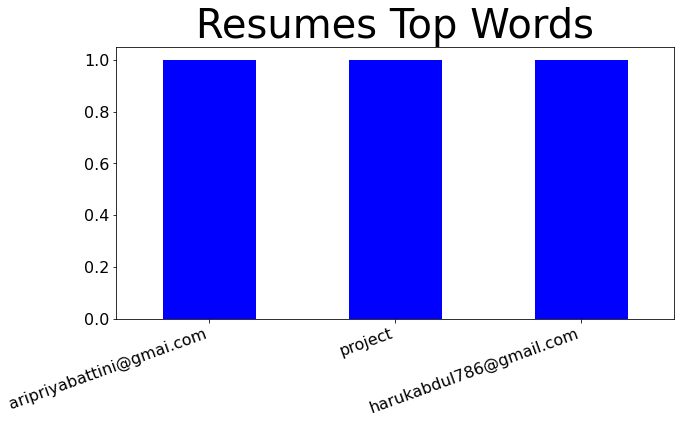

In [14]:
import itertools

c = list(
itertools.chain(
    *data.Resumes.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(10, 5), fontsize=16, color='blue'
)
plt.gca().set_title('Resumes Top Words', fontsize=40)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=20, ha='right', fontsize=16)
pass

# Tokenization

In [15]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings(considered in Python as False)
data[0:10]

['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n

In [17]:
review_text=' '.join(data)
review_text[:1000]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

In [18]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['Name', ':', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', ':', 'BE', '(', 'computer', 'science', 'and', 'Engg', ')', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', '.', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', '/', 'Course', 'College', '/', 'Institute', 'University', '/', 'Board', 'Percentage', '/', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '6.5', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State']


In [19]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'Name : Ravali P Curriculum Vitae Specialization : BE ( computer science and Engg ) C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization . E D U C A T ION E D U C A T ION Degree / Course College / Institute University / Board Percentage / CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 6.5 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination , Bengaluru 60 % 2017 SSLC Empress girls high school Karnataka Secondary Education Board 52.8 % 2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts . Extensive knowledge in White Box Testing . Good knowledge in Functional testing , Integration testing , Extreme Knowledge on System Testing Good knowledge in Adhoc Testing , Reliability testing . Good Knowledge on Exploratory Testing Good knowledge in STLC concepts . Good knowledge in Test cases and Test scenarios . Good knowledge i

Removing Punctuations, URL from data# 

In [20]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testin

In [21]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testin

Tokenization on 100 Words

In [22]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'and', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'of', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress']


In [23]:
len(text_tokens)

58363

# Removing Stopwords

In [24]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL']


In [25]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'passing', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girls', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


# Stemming

In [26]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['name', 'ravali', 'p', 'curriculum', 'vita', 'special', 'be', 'comput', 'scienc', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'util', 'technic', 'skill', 'achiev', 'target', 'develop', 'best', 'perform', 'organ', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degre', 'cours', 'colleg', 'institut', 'univers', 'board', 'percentag', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institut', 'technolog', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechn', 'karnataka', 'state', 'board', 'technic', 'examin', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondari', 'educ', 'board', '528', '2011', 'manual']


In [27]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct i v e c a r ee r ob je ct i v e to utilize technical skills achieving target developing best performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year passing cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girls high school karnataka secondary education board 528 2011 manual


# Lemmatization

In [28]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'to', 'utilize', 'technical', 'skill', 'achieve', 'target', 'develop', 'good', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


In [29]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct I v e c a r ee r ob je ct I v e to utilize technical skill achieve target develop good performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year pass cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 528 2011 manual testing skill strong knowledge sdlc concept extensive knowledge white box test good knowledge functional testing integration test extreme knowledge system test good knowledge adhoc testing reliability test good knowledge exploratory testing good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression test good knowledge test plan s ql s k i ll s goo k n w l e 

# Text Processing On DataFrame

In [30]:
data = pd.read_csv("C:\\Users\\shama\\Downloads\\Resume.csv")

In [31]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [32]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P \n\n\n\n ...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,Name: M. Prabakaran\nTitle: UI Developer\nPROF...
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
7,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A \n\nLinked In: https://www....


In [33]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...


In [34]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...


In [35]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...


In [36]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,Name: M. Prabakaran Title: UI Developer PROFES...
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...


# Cleaning Words From Text

In [37]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [38]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,name m prabakaran title ui developer professio...
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu  geethika presti...
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
7,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...


# Removing Emoji

In [39]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [40]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head()

,Resumes,Category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,name m prabakaran title ui developer professio...


# Applying Tokenization On Clean_Resumes

In [41]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head()

,Resumes,Category,Clean_Resumes,Tokenized_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,"[mareedu, lokesh, babu, professional, overview..."
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel..."
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,name m prabakaran title ui developer professio...,"[name, m, prabakaran, title, ui, developer, pr..."


In [42]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

# Removing stop words from Clean_Resumes and making it Cleaned_Resumes

In [43]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Cleaned_Resumes'] = cleaned_resumes
data.head()

,Resumes,Category,Clean_Resumes,Cleaned_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,name m prabakaran title ui developer professio...,name m prabakaran title ui developer professio...


In [44]:
Tokenized_Resume = data['Cleaned_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head()

0    [name, ravali, p, curriculum, vitae, specializ...
1    [mareedu, lokesh, babu, professional, overview...
2    [susovan, bag, seeking, a, challenging, positi...
3    [haripriya, battina, experience, as, ui, devel...
4    [name, m, prabakaran, title, ui, developer, pr...
Name: Cleaned_Resumes, dtype: object

# Lemmatization on Abosulte_Clean_Resumes

In [45]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [name, ravali, p, curriculum, vitae, specializ...
1    [mareedu, lokesh, babu, professional, overview...
2    [susovan, bag, seeking, a, challenging, positi...
3    [haripriya, battina, experience, a, ui, develo...
4    [name, m, prabakaran, title, ui, developer, pr...
Name: Cleaned_Resumes, dtype: object

In [46]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Cleaned_Resumes'] = Tokenized_Resume
data.head()

,Resumes,Category,Clean_Resumes,Cleaned_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
4,Name: M. Prabakaran\nTitle: UI Developer\nPROF...,React JS Developer Resume,name m prabakaran title ui developer professio...,name m prabakaran title ui developer professio...


# Count Vectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [48]:
print(cv.get_feature_names()[100:2000])

['1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009', '20092011', '20092013', '2010', '2011', '20112013', '20112015', '2012', '20122014', '20122016', '2012r2', '2013', '20132017', '2014', '20142012', '20142016', '20142017', '2015', '20152017', '2016', '20162012', '2016r2', '2017', '20172019', '201784006', '2018', '2019', '2019to', '2020', '2021', '2022', '204', '21', '210', '211', '22', '2203', '2208', '224', '22nd', '23', '2301', '24', '247', '25', '25th', '26', '2601', '2627', '26387', '2705', '2728', '27th', '28', '281121', '2930', '2k15', '2k16', '2k18', '30', '300', '3015', '3031', '30th', '31', '310', '312', '32', '3233', '33', '34', '35', '36', '360', '364445', '365', '37', '38', '39', '3year', '401', '401k', '41', '411', '42', '43', '44', '46', '49600', '498', '50', '500090', '508', '51', '518', '52', '5267', '528', '53', '5312', '538', '53854', '54'

In [49]:
print(cv.get_feature_names()[:4000])

['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009'

In [50]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
print(review_cv.toarray().shape)

(45752, 4370)


# Count vectorizer on NGrams 

In [52]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [53]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009'

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)

In [55]:
data

,Category,Cleaned_Resumes
0,React JS Developer Resume,name ravali p curriculum vitae specialization ...
1,React JS Developer Resume,mareedu lokesh babu professional overview arou...
2,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,React JS Developer Resume,haripriya battina experience as ui developer i...
4,React JS Developer Resume,name m prabakaran title ui developer professio...
...,...,...
74,Workday Resume,years of it experience as workday hcm technica...
75,Workday Resume,ramesh a workday hcm consultant professional s...
76,Workday Resume,name j sumanth royal professional summary have...
77,Workday Resume,vinay kumar v workday functional consultant ex...


In [56]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Cleaned_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 597), ('peoplesoft', 443), ('workday', 427), ('application', 417), ('using', 395), ('server', 350), ('data', 332), ('reports', 322), ('project', 305), ('business', 269), ('web', 241), ('database', 238), ('sql', 237), ('process', 233), ('worked', 219), ('knowledge', 210), ('client', 192), ('system', 190), ('involved', 189), ('tools', 189), ('integrations', 187), ('integration', 181), ('like', 180), ('support', 175), ('hcm', 173), ('skills', 170), ('good', 169), ('development', 163), ('team', 163), ('creating', 163), ('working', 161), ('people', 160), ('technical', 157), ('design', 152), ('servers', 151), ('services', 151), ('testing', 150), ('report', 150), ('various', 146), ('created', 146), ('role', 139), ('environment', 138), ('developer', 136), ('responsibilities', 134), ('security', 133), ('oracle', 133), ('management', 132), ('production', 130), ('issues', 129), ('studio', 127), ('eib', 127), ('’', 125), ('work', 123), ('core', 121), ('custom', 118), ('react', 117)

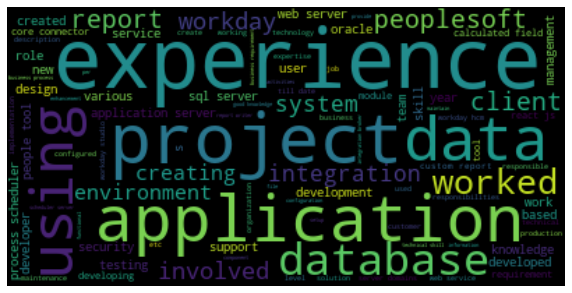

In [57]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

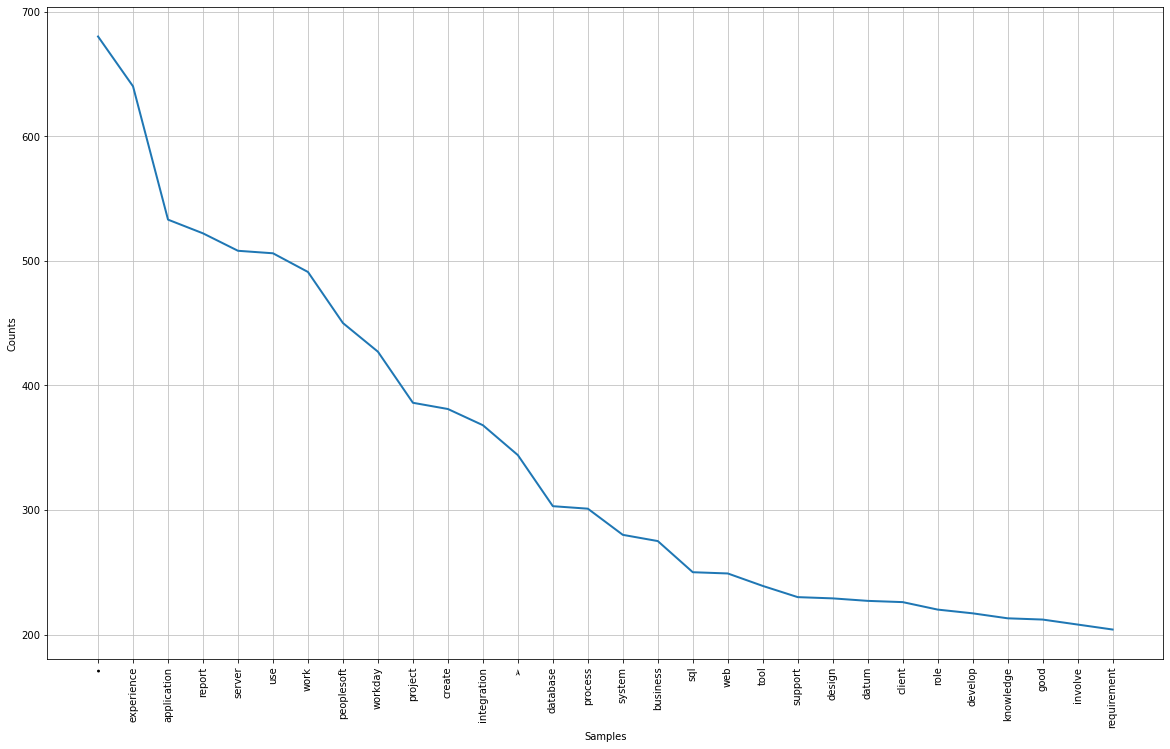

In [58]:
##Word cloud Vs the Frequency plot
import matplotlib.pyplot as plt
# the frequency distribution of lema_words
freq_dist =nltk.FreqDist(lemmas)
#freq_dist = nltk.FreqDist(lem_words)
## frequency distribution plots
plt.subplots(figsize=(20,12))
freq_dist.plot(30);

Calculating each Characterstic in dataframe

In [59]:
characters=data["Cleaned_Resumes"].apply(len)
characters

0     3531
1     2091
2     1314
3     2386
4     2439
      ... 
74    4293
75    5407
76    5618
77    4736
78    6044
Name: Cleaned_Resumes, Length: 79, dtype: int64

In [60]:
print('Total Number of characters dataset:',characters.sum())
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())

Total Number of characters dataset: 379247
Mean of each characters in datset: 4800.594936708861
Median of characters in dataset: 4051.0
Standard Deviation of characters in dataset: 2861.39086011209
skew of characters dataset: 1.7941120413175726


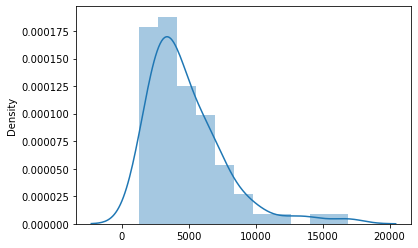

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x = characters);

Calculating each Word Characterstic in dataframe

In [62]:
words = data['Cleaned_Resumes'].apply(lambda x: len(str(x).split(' ')))
words

0     770
1     299
2     181
3     362
4     348
     ... 
74    597
75    741
76    786
77    660
78    867
Name: Cleaned_Resumes, Length: 79, dtype: int64

In [63]:
print('Total Number of Word in dataset:',words.sum())
print('Mean of each Word in datset:',words.mean())
print('Median of Word in dataset:',words.median())
print('Standard Deviation of Word in dataset:',words.std())
print('skew of Word dataset:',words.skew())

Total Number of Word in dataset: 53847
Mean of each Word in datset: 681.6075949367089
Median of Word in dataset: 573.0
Standard Deviation of Word in dataset: 397.9783661728077
skew of Word dataset: 1.7561248217535703


<AxesSubplot:ylabel='Density'>

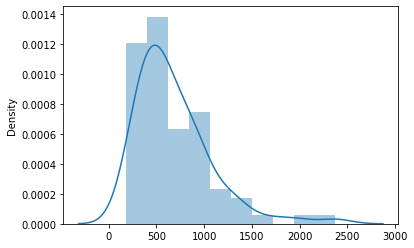

In [64]:
sns.distplot(x = words)

# VISUALIZATION OF DATASET

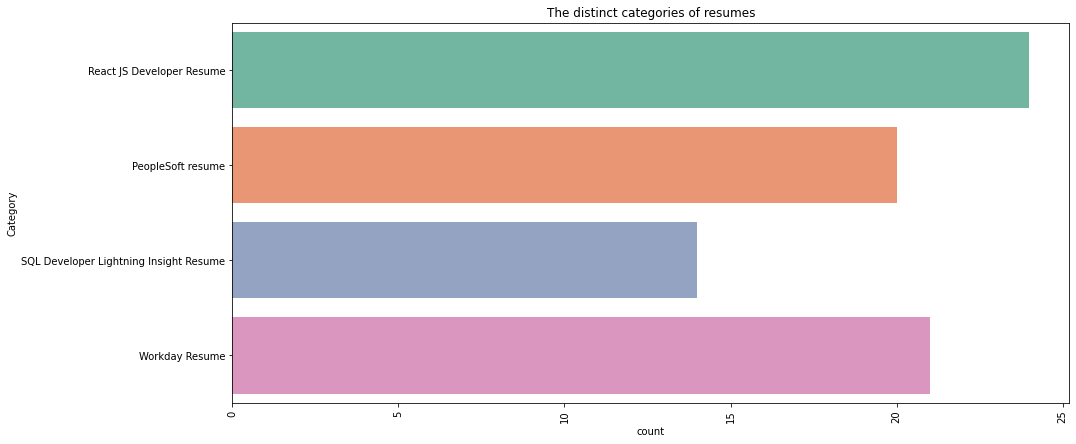

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data,palette=("Set2"))
plt.show()

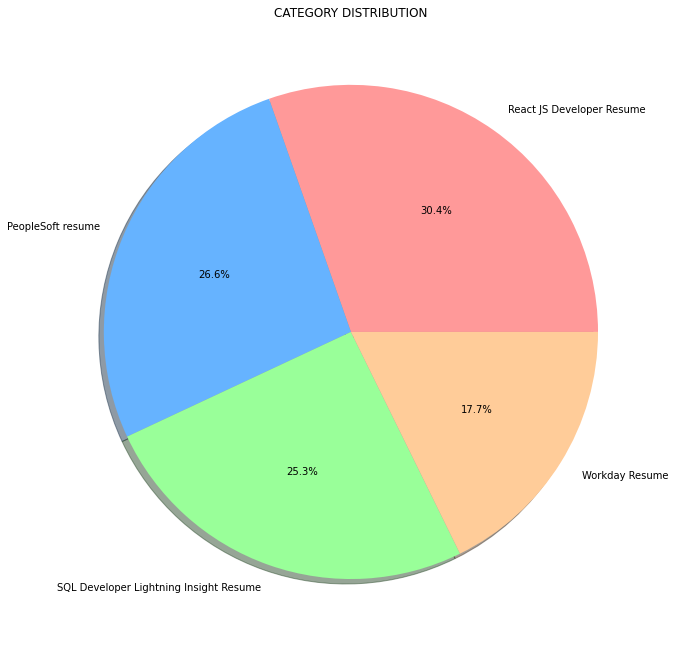

In [66]:
from matplotlib.gridspec import GridSpec
targetCounts = data.Category.value_counts()
targetLabels  = data.Category.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')


source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [67]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

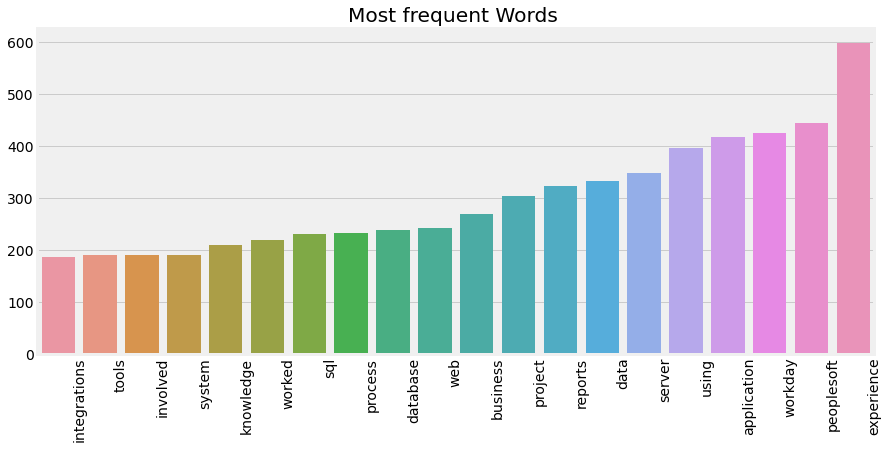

In [68]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(data,"Cleaned_Resumes","Most frequent Words ")

In [69]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

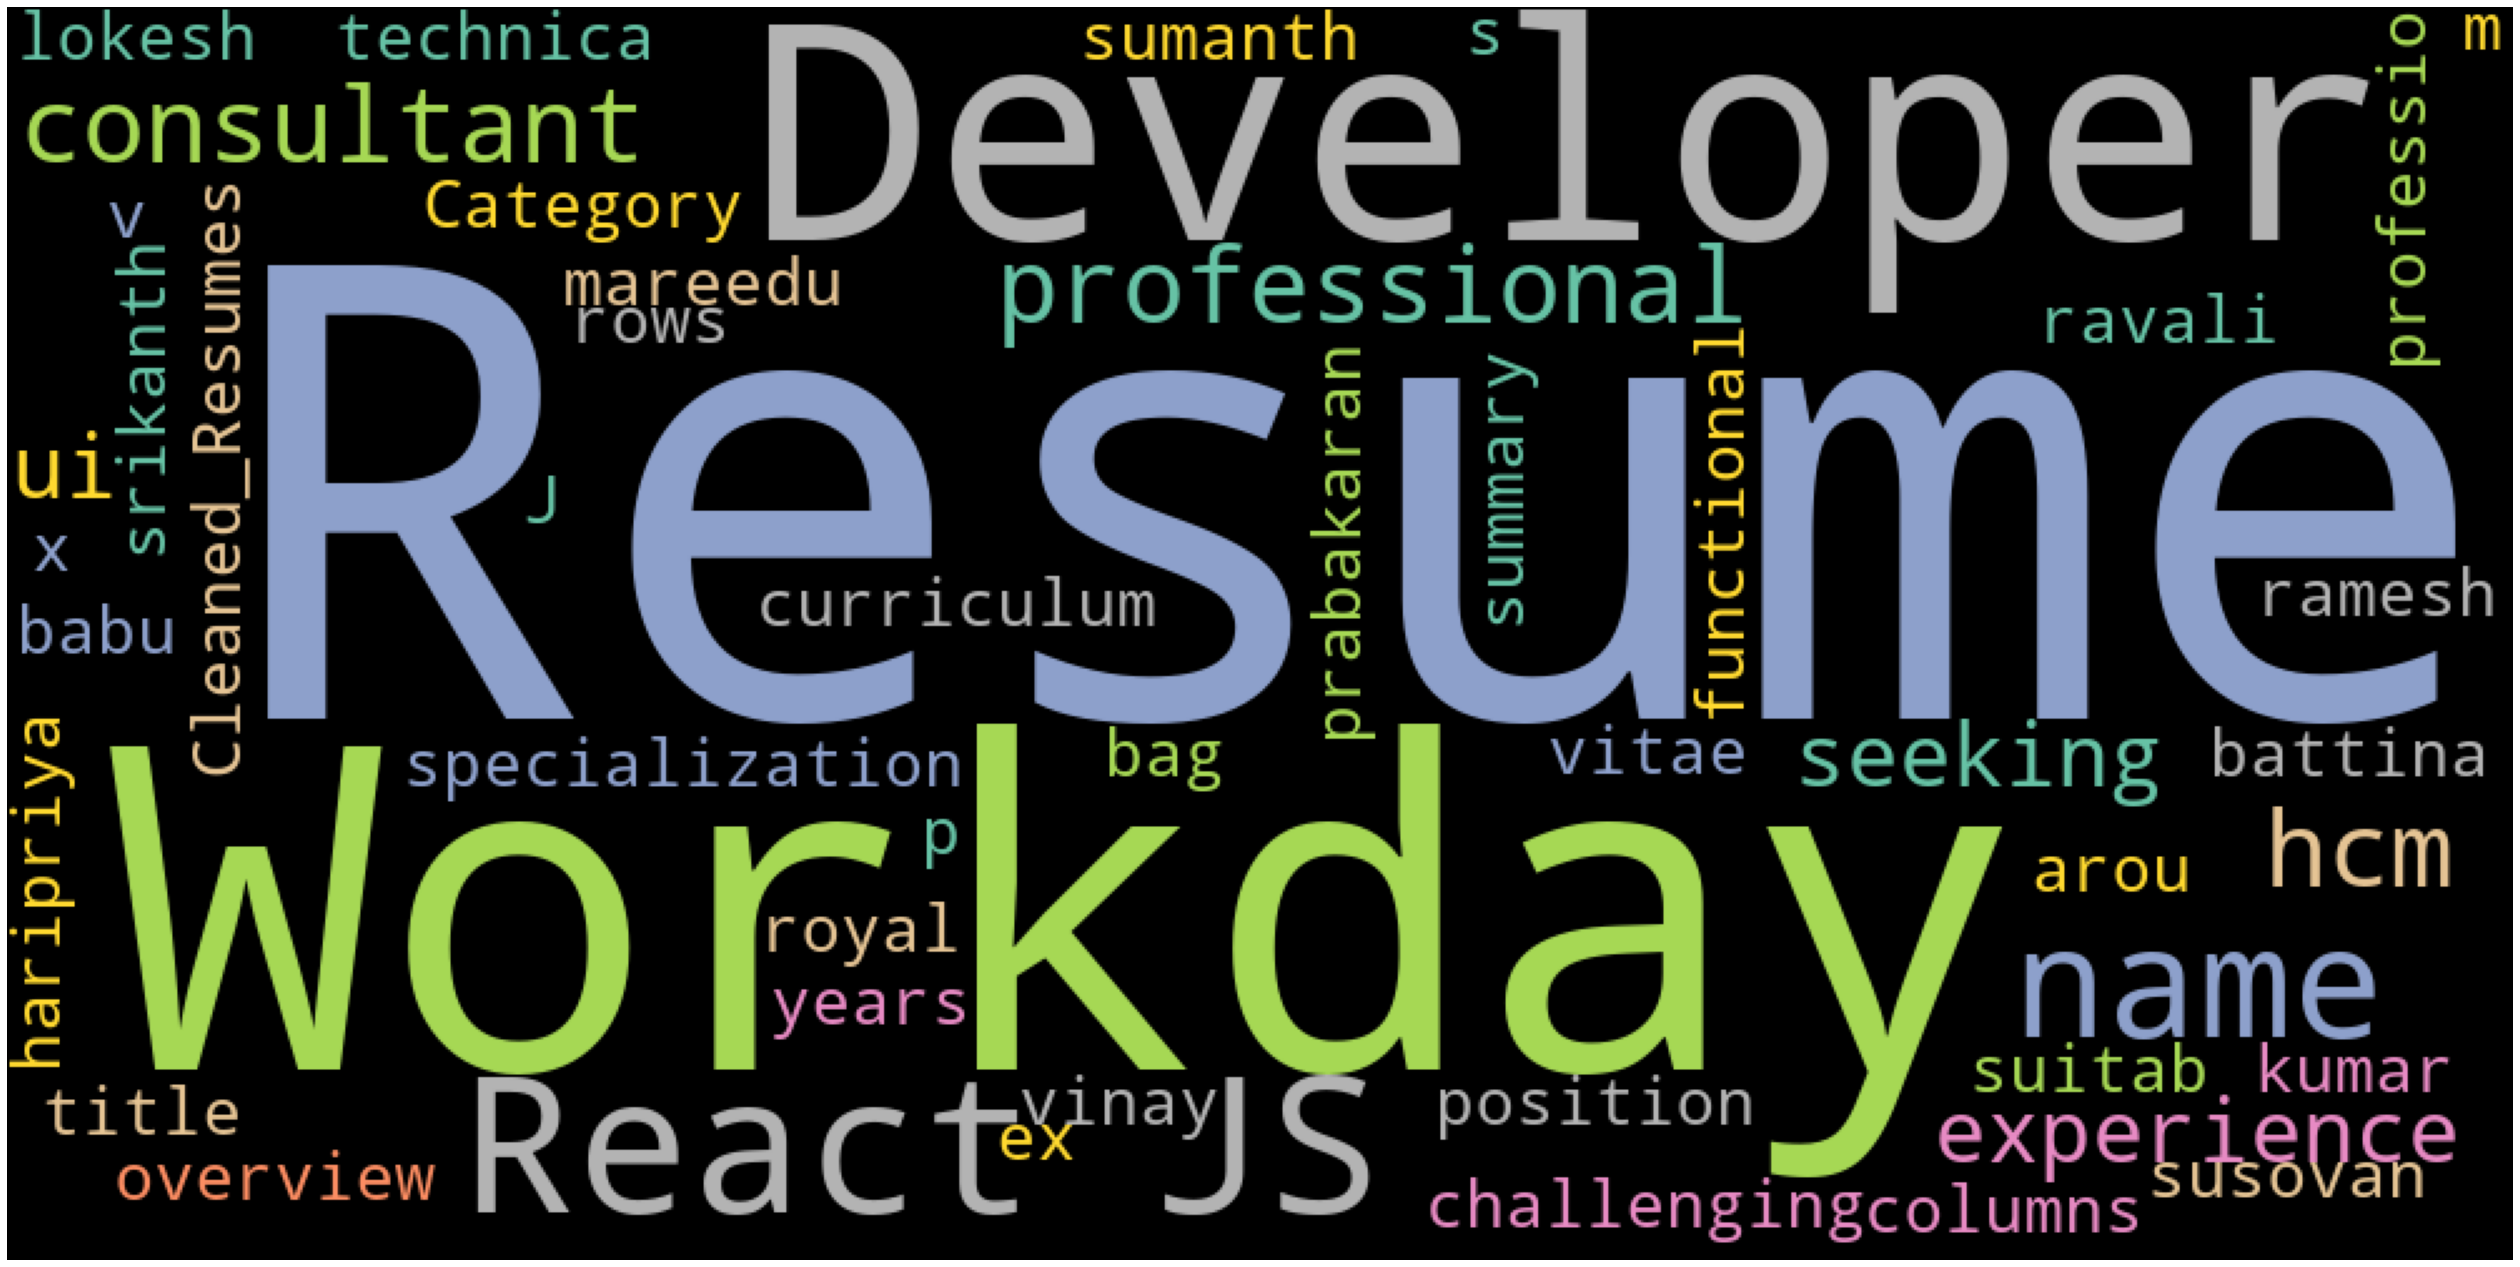

In [70]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1000, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(data))
# Plot
plot_cloud(wordcloud)

In [71]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [72]:
data_categories = [data[data['Category'] == category].loc[:, ['Cleaned_Resumes', 'Category']] for category in categories]
data_categories

[                                      Cleaned_Resumes           Category
 24  sirazuddin m bangalore india sirazuddin m bang...  PeopleSoft resume
 25  anubhav kumar singh core competencies scriptin...  PeopleSoft resume
 26  c o n t a c t address manyata tech park nagava...  PeopleSoft resume
 27  rahul ahuja summary years of experience in peo...  PeopleSoft resume
 28  priyabrata hota career objective pursuing peop...  PeopleSoft resume
 29  vinod akkala peoplesoft dba admin professional...  PeopleSoft resume
 30  peoplesoft administrator srinivask experience ...  PeopleSoft resume
 31  arun venu experience summary experience of yea...  PeopleSoft resume
 32  peoplesoft admin varkala vikas career objectiv...  PeopleSoft resume
 33  tanna sujatha objective seeking a challenging ...  PeopleSoft resume
 34  peoplesoft adminpeoplesoft dba ganesh alladi c...  PeopleSoft resume
 35  priyanka ramadoss mountpleasant coonoor the ni...  PeopleSoft resume
 36  peoplesoft administration vivekan

In [73]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Cleaned_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

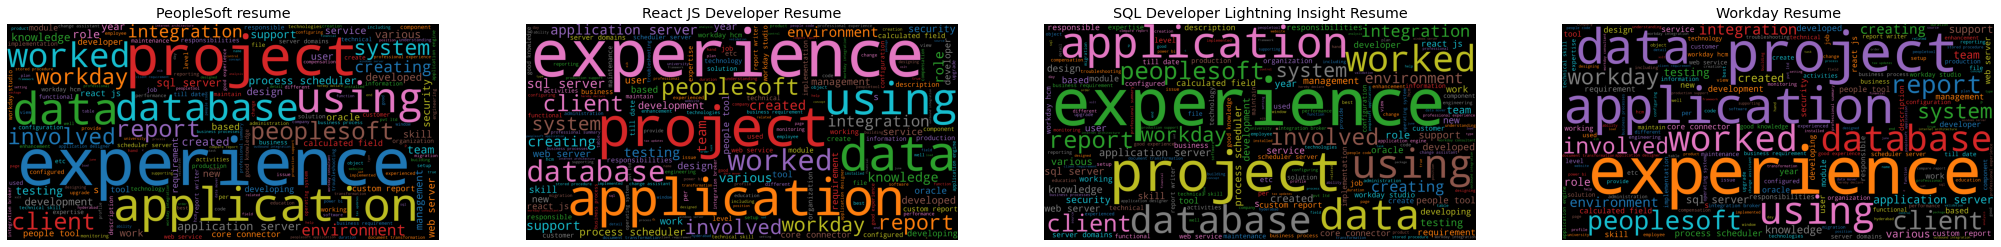

In [94]:
PLOT_PALETTE = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# Data Preprocessing

Label encoding to convert category variable from string datatype to float datatype 

In [74]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
data["Encoded_Skill"] = le_encoder.fit_transform(data["Category"])
data.head()

,Category,Cleaned_Resumes,Encoded_Skill
0,React JS Developer Resume,name ravali p curriculum vitae specialization ...,1
1,React JS Developer Resume,mareedu lokesh babu professional overview arou...,1
2,React JS Developer Resume,susovan bag seeking a challenging position in ...,1
3,React JS Developer Resume,haripriya battina experience as ui developer i...,1
4,React JS Developer Resume,name m prabakaran title ui developer professio...,1


# Bag Of Words

In [75]:
requiredText = data["Cleaned_Resumes"]
requiredTarget = data["Encoded_Skill"].values
Countvectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = Countvectorizer.fit_transform(requiredText)
Countvectorizer.vocabulary_

{'ravali': 3415,
 'p': 2955,
 'curriculum': 1016,
 'vitae': 4594,
 'specialization': 3961,
 'computer': 809,
 'science': 3739,
 'engg': 1407,
 'c': 553,
 'r': 3385,
 'ee': 1334,
 'ob': 2827,
 'je': 2227,
 'ct': 1000,
 'v': 4514,
 'e': 1309,
 'utilize': 4505,
 'technical': 4228,
 'skills': 3905,
 'achieving': 39,
 'target': 4201,
 'developing': 1189,
 'best': 432,
 'performance': 3051,
 'organization': 2916,
 'd': 1039,
 'u': 4427,
 't': 4179,
 'ion': 2186,
 'degreecourse': 1110,
 'collegeinstitute': 748,
 'university': 4456,
 'board': 470,
 'percentage': 3047,
 'cgpa': 649,
 'year': 4741,
 'passing': 2998,
 'cgpacgpa': 650,
 's': 3680,
 'j': 2214,
 'b': 364,
 'institute': 2117,
 'technology': 4239,
 'vtu': 4618,
 'diploma': 1220,
 'aryabharathi': 278,
 'polytechnic': 3138,
 'karnataka': 2278,
 'state': 4044,
 'examination': 1480,
 'bengaluru': 431,
 'sslc': 4013,
 'empress': 1387,
 'girls': 1739,
 'high': 1886,
 'school': 3732,
 'secondary': 3764,
 'education': 1329,
 'manual': 2510,
 

# VECTORIZATION
COUNT VECTORIZER tells the frequency of a word.

In [76]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(data["Cleaned_Resumes"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

,term,occurrences,frequency
0,aa,1,0.000024
1,abdul,2,0.000048
2,abilities,4,0.000096
3,abilitiescommunication,1,0.000024
4,ability,41,0.000980
...,...,...,...
4910,zenefits,3,0.000072
4911,zero,1,0.000024
4912,zerozilla,2,0.000048
4913,zones,1,0.000024


<AxesSubplot:ylabel='Density'>

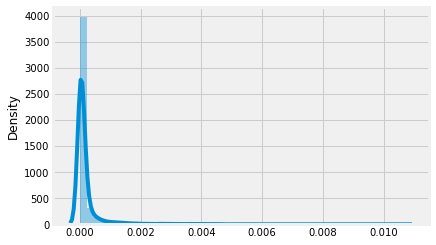

In [77]:
sns.distplot(x =[word_freq_df['frequency']])

In [78]:
data.to_csv("cleaned_data.csv")